In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
Floating_pop=pd.read_csv('Floating_Population.csv',encoding='euckr')

In [3]:
Roaming=pd.read_csv('Roaming.csv',encoding='euckr')

In [4]:
Call=pd.read_csv('CallData.csv',encoding='euckr')

In [5]:
Call['count']=1

In [6]:
Roaming

,출국년월(YYYYMM),대륙,출국국가,성별,연령,출국비율
0,201902,기타,기타,남성,20,0.0526
1,201902,기타,기타,남성,30,0.0853
2,201902,기타,기타,남성,40,0.1222
3,201902,기타,기타,남성,50,0.1409
4,201902,기타,기타,남성,60,0.1041
...,...,...,...,...,...,...
17803,202008,중동,쿠웨이트,남성,40,0.3234
17804,202008,중동,쿠웨이트,남성,50,0.1893
17805,202008,중동,쿠웨이트,남성,60,0.0931
17806,202008,중동,쿠웨이트,여성,30,0.0521


In [7]:
Floating_pop

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20190301,0,20,남성,서울,양천구,28720
1,20190301,0,20,남성,서울,종로구,15920
2,20190301,0,20,남성,서울,중랑구,26250
3,20190301,0,20,여성,서울,중랑구,25890
4,20190301,0,30,남성,서울,강동구,34090
...,...,...,...,...,...,...,...
2639695,20200831,22,20,남성,서울,서초구,26890
2639696,20200831,23,30,남성,서울,성북구,33590
2639697,20200831,23,30,여성,서울,동작구,34770
2639698,20200831,23,70,여성,서울,금천구,10860


In [8]:
Floating_pop['일자'] = pd.to_datetime(Floating_pop['일자'], format='%Y%m%d', errors='raise',yearfirst=True)

In [9]:
grouped = Floating_pop.groupby(Floating_pop['일자'])

In [51]:
grouped.sum()

,시간(1시간단위),연령대(10세단위),유동인구수
일자,,,
2019-03-01,82800,324000,186367740
2019-03-02,82800,324000,185721180
2019-03-03,77700,310500,180126230
2019-03-04,82800,324000,197684760
2019-03-05,82800,324000,198261610
...,...,...,...
2020-08-27,82800,324000,195773220
2020-08-28,82800,324000,195081550
2020-08-29,82800,324000,187376270


In [11]:
plt.rcParams["figure.figsize"] = (20,20)


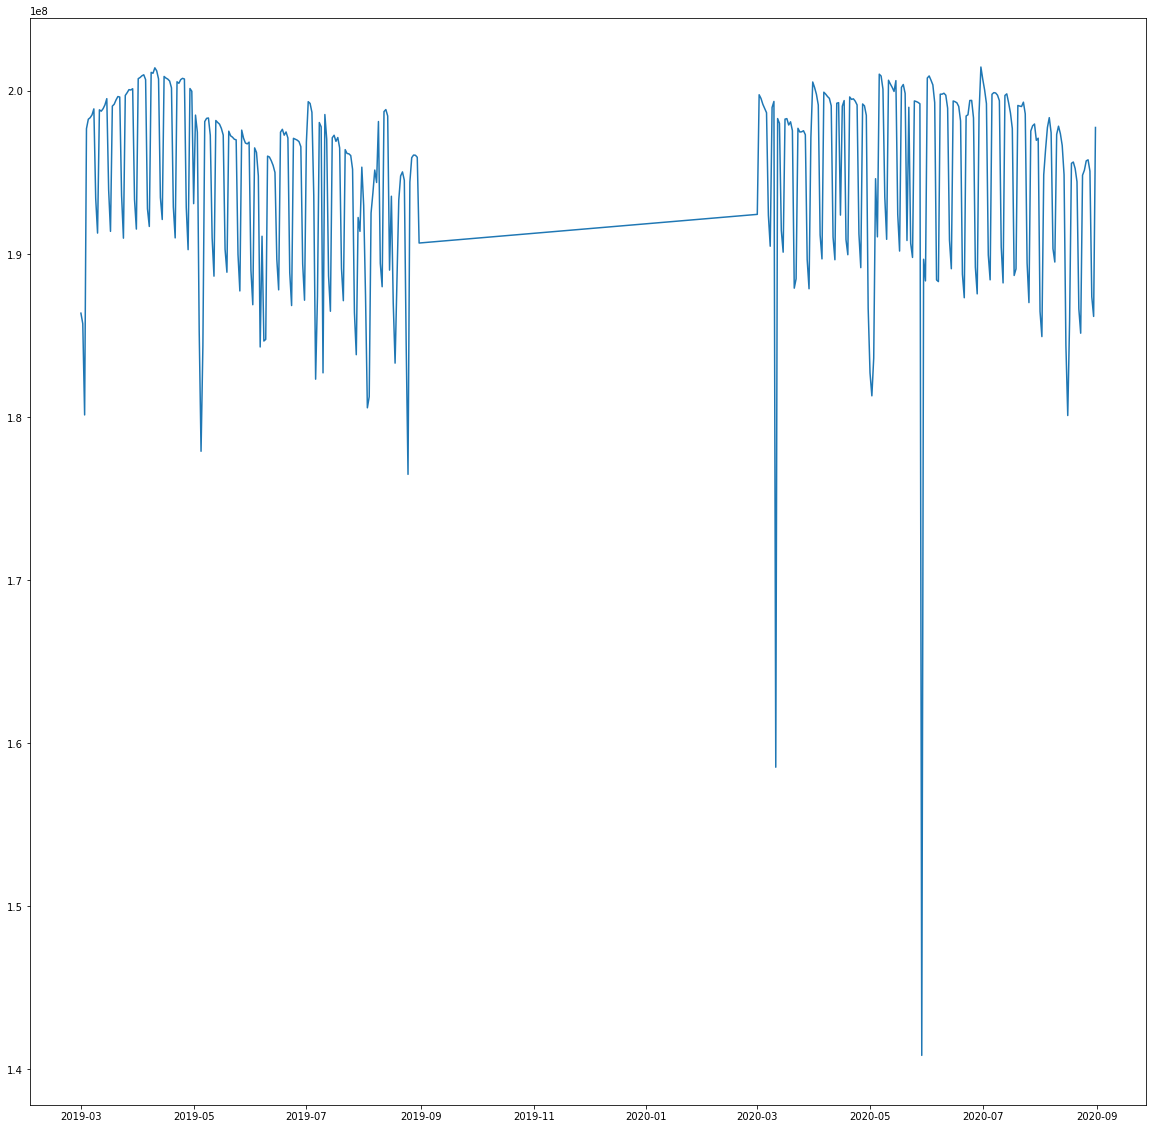

In [50]:
plt.plot(pd.to_datetime(grouped.sum().index),grouped.sum()['유동인구수'])

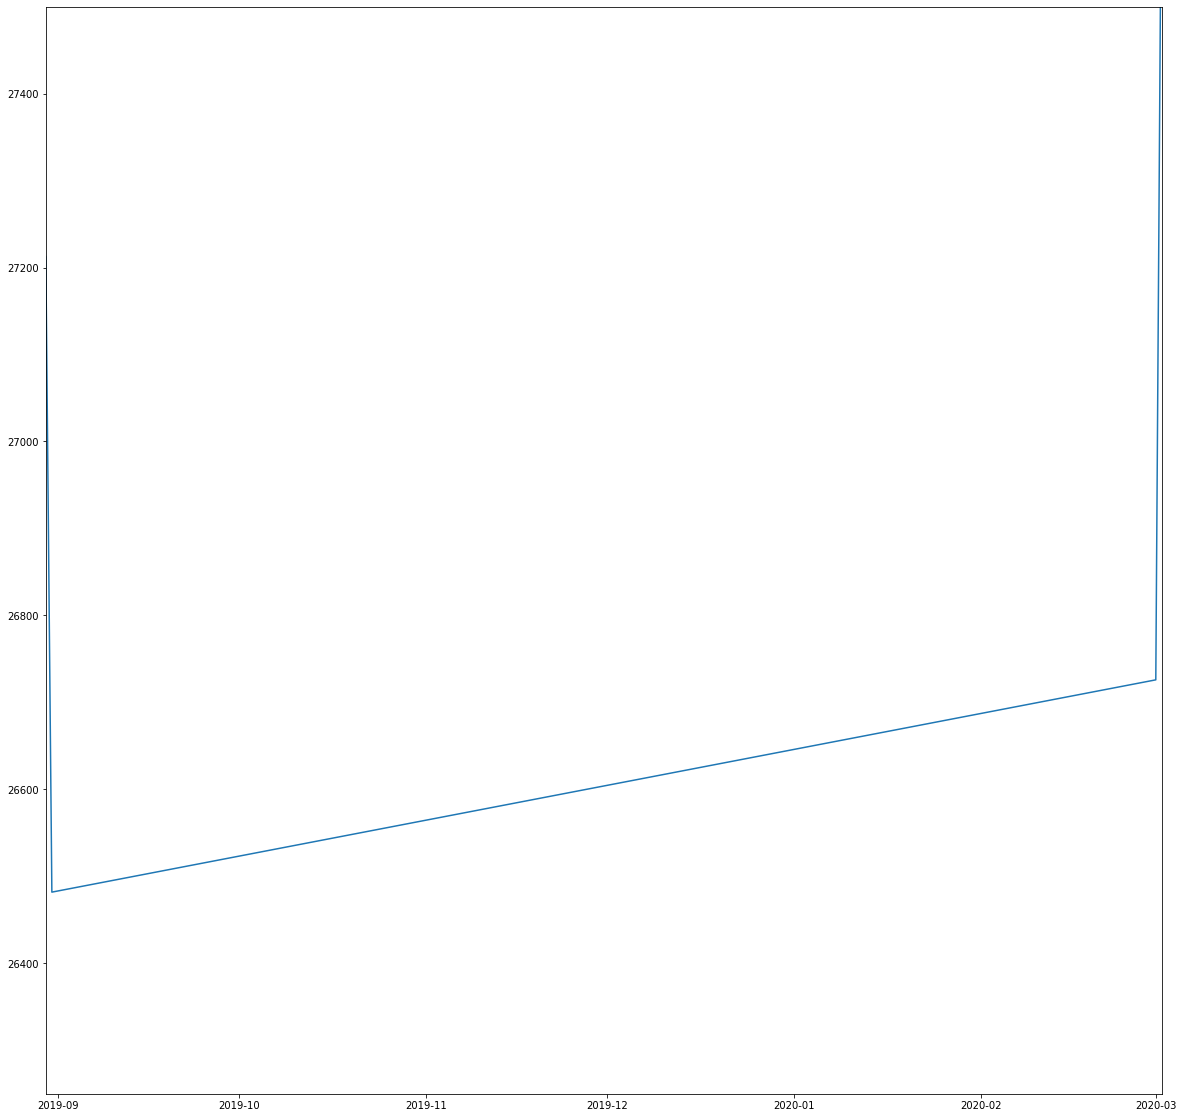

In [13]:
plt.xlim([datetime.datetime(2019,8,30),datetime.datetime(2020,3,2)])
plt.ylim([26250,27500])
plt.plot(pd.to_datetime(grouped.mean().index),grouped.mean()['유동인구수'])

In [14]:
grouped.sum()

,시간(1시간단위),연령대(10세단위),유동인구수
일자,,,
2019-03-01,82800,324000,186367740
2019-03-02,82800,324000,185721180
2019-03-03,77700,310500,180126230
2019-03-04,82800,324000,197684760
2019-03-05,82800,324000,198261610
...,...,...,...
2020-08-27,82800,324000,195773220
2020-08-28,82800,324000,195081550
2020-08-29,82800,324000,187376270


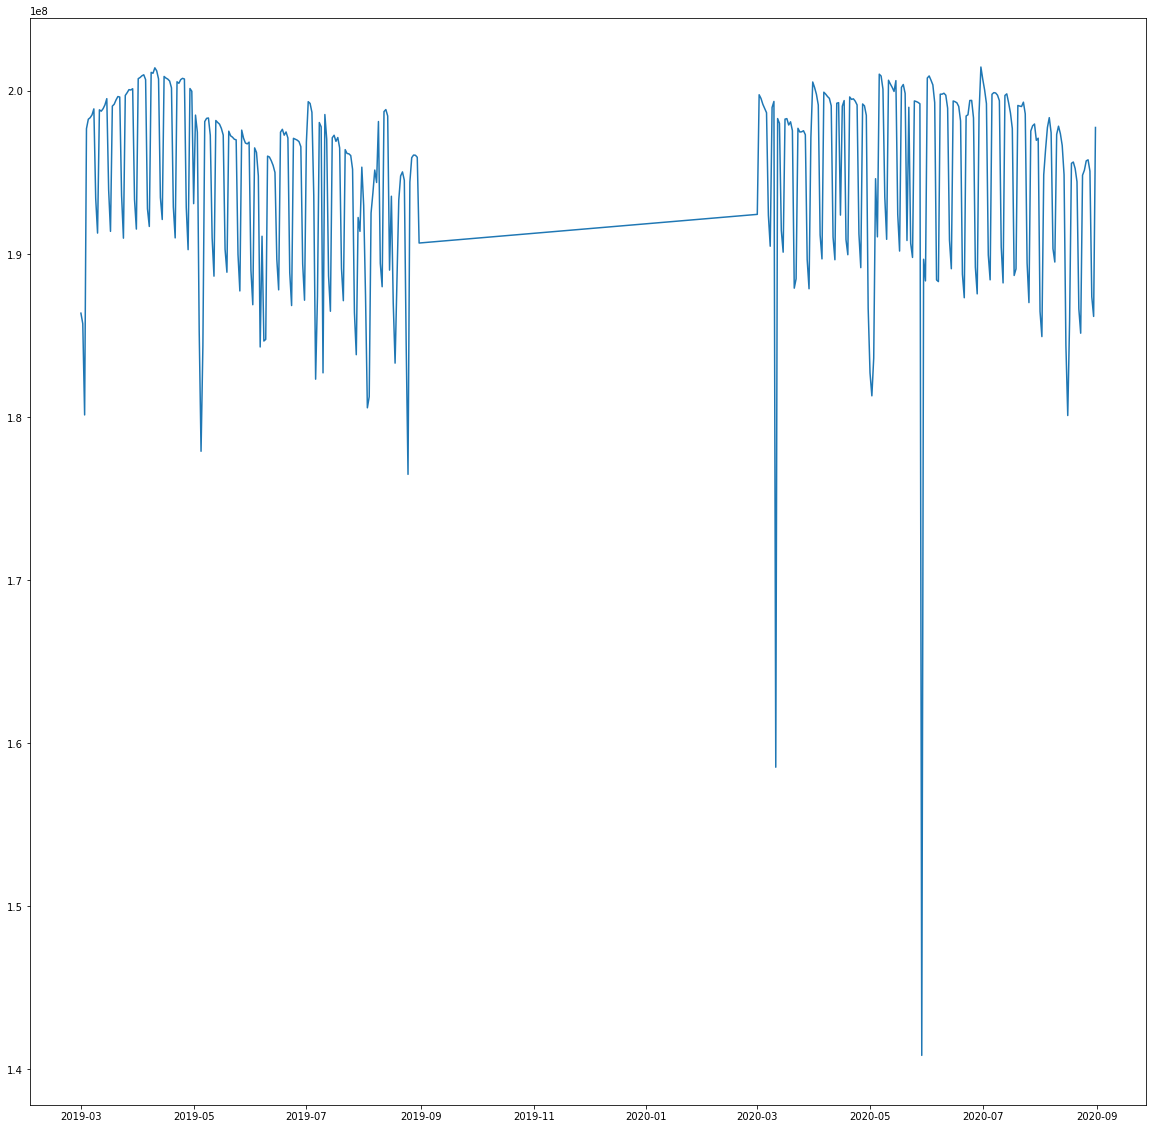

In [15]:
plt.plot(pd.to_datetime(grouped.sum().index),grouped.sum()['유동인구수'])

In [28]:
Call=pd.read_csv('CallData.csv',encoding='euckr')

In [29]:
Call['count']=1

In [30]:
Call['일자(YYYYMMDD)'] = pd.to_datetime(Call['일자(YYYYMMDD)'] , format='%Y%m%d', errors='raise',yearfirst=True)

In [31]:
Call_building=Call[Call['대분류']=='건물/시설']
Call_facility=Call[Call['대분류']=='공공편의']
Call_education=Call[Call['대분류']=='교육/한문']
Call_traffic=Call[Call['대분류']=='교통편의']
Call_fund=Call[Call['대분류']=='금융편의']
Call_company=Call[Call['대분류']=='기업/단체']
Call_living=Call[Call['대분류']=='생활편의']
Call_sevice=Call[Call['대분류']=='서비스산업']
Call_shopping=Call[Call['대분류']=='쇼핑']
Call_sports=Call[Call['대분류']=='스포츠/레저']
Call_trip=Call[Call['대분류']=='여행']
Call_restaurant=Call[Call['대분류']=='음식점']
Call_health=Call[Call['대분류']=='의료편의']
Call_event=Call[Call['대분류']=='이벤트']

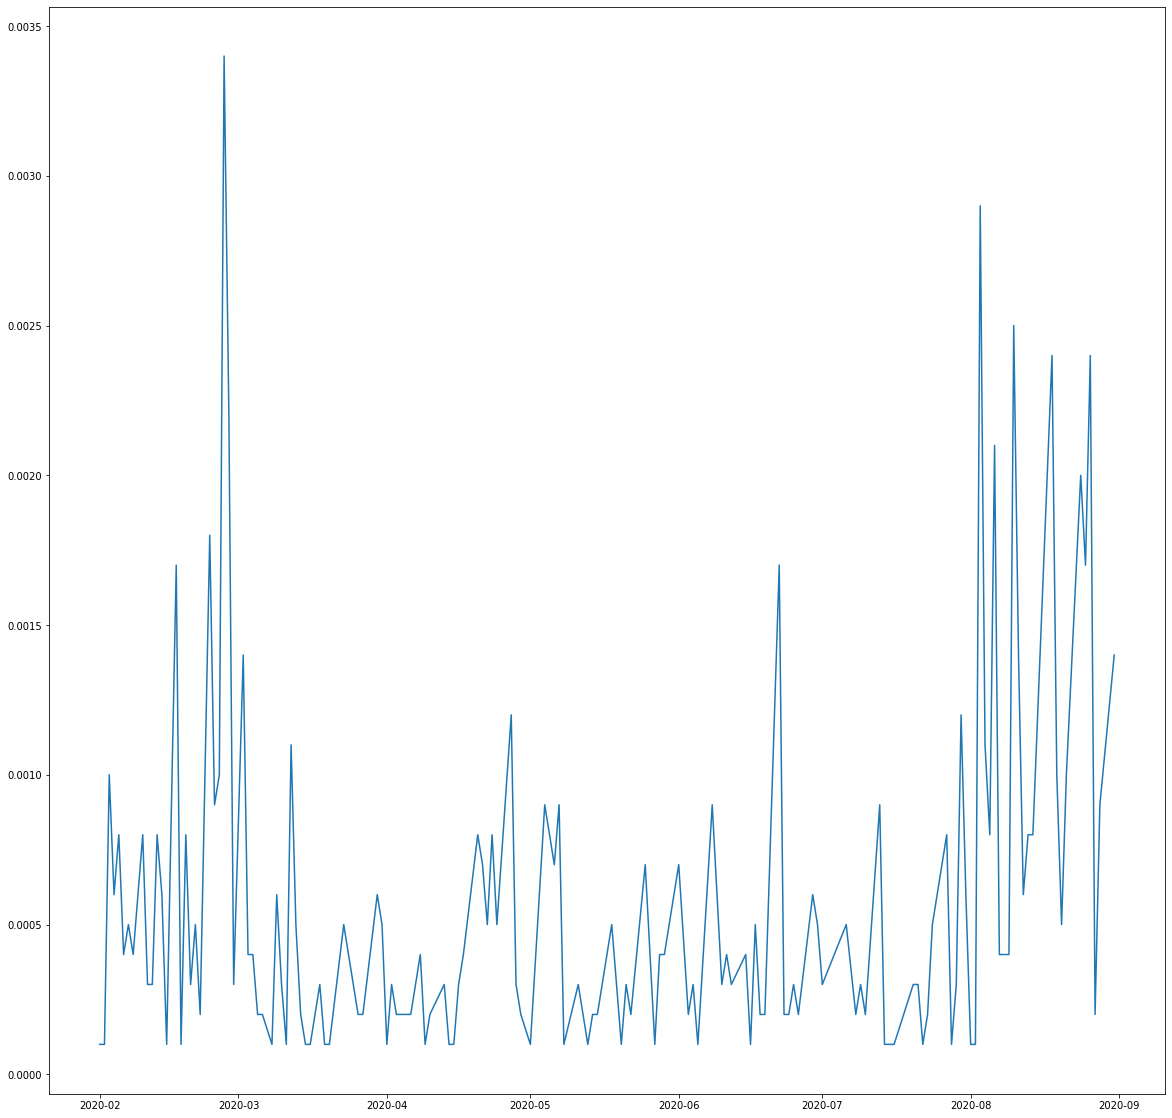

In [32]:
Call_building_grouped = Call_building.groupby(Call_building['일자(YYYYMMDD)'])
#Call_building_grouped.sum()
plt.plot(pd.to_datetime(Call_building_grouped.sum().index),Call_building_grouped.sum()['통화비율(시군구내)'])

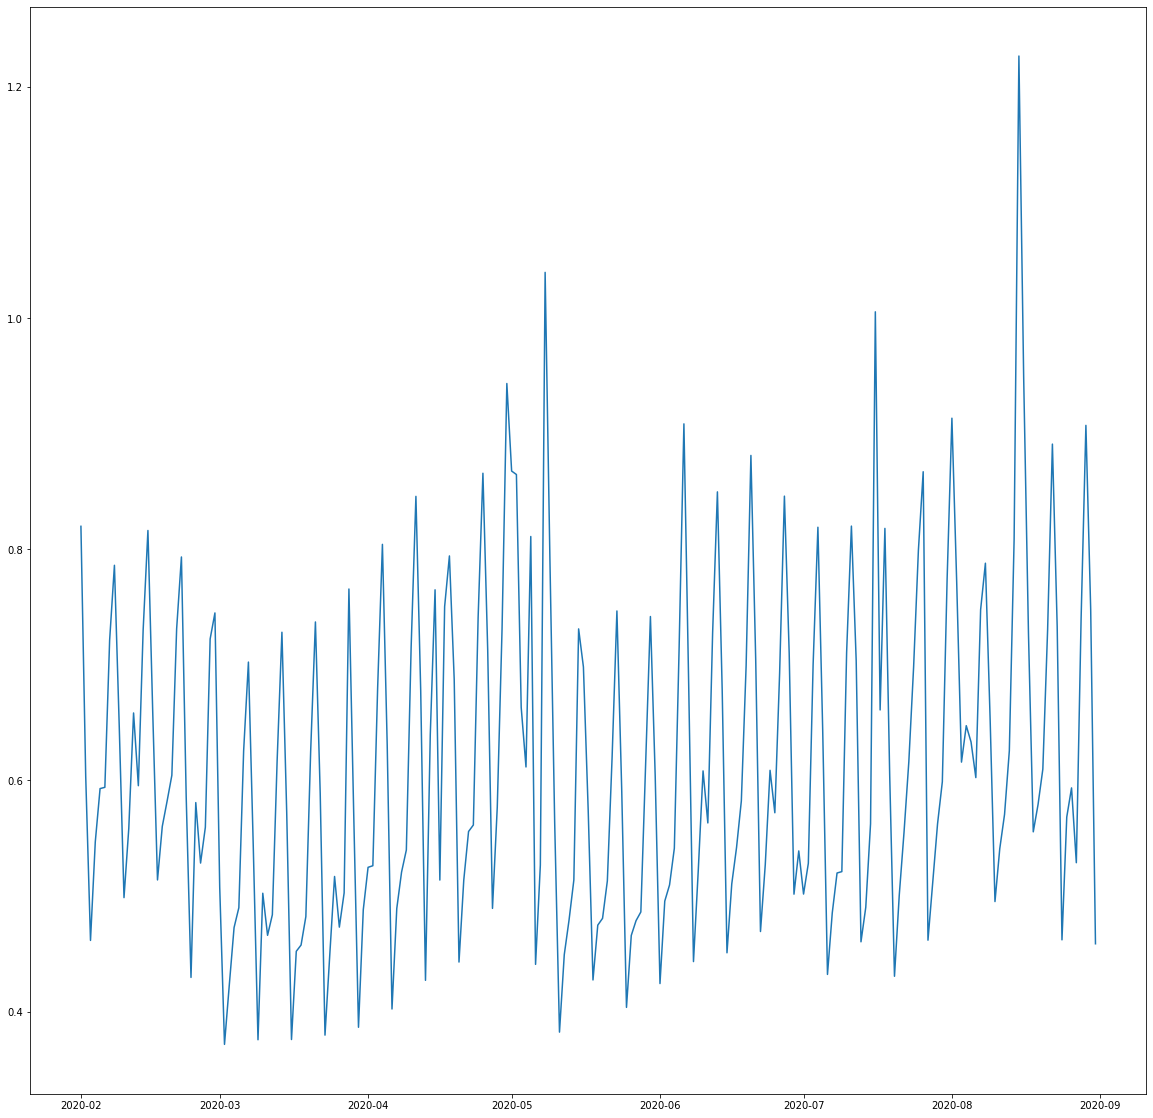

In [33]:
Call_restaurant_grouped = Call_restaurant.groupby(Call_restaurant['일자(YYYYMMDD)'])
#Call_restaurant_grouped.sum()
plt.plot(pd.to_datetime(Call_restaurant_grouped.sum().index),Call_restaurant_grouped.sum()['통화비율(시군구내)'])

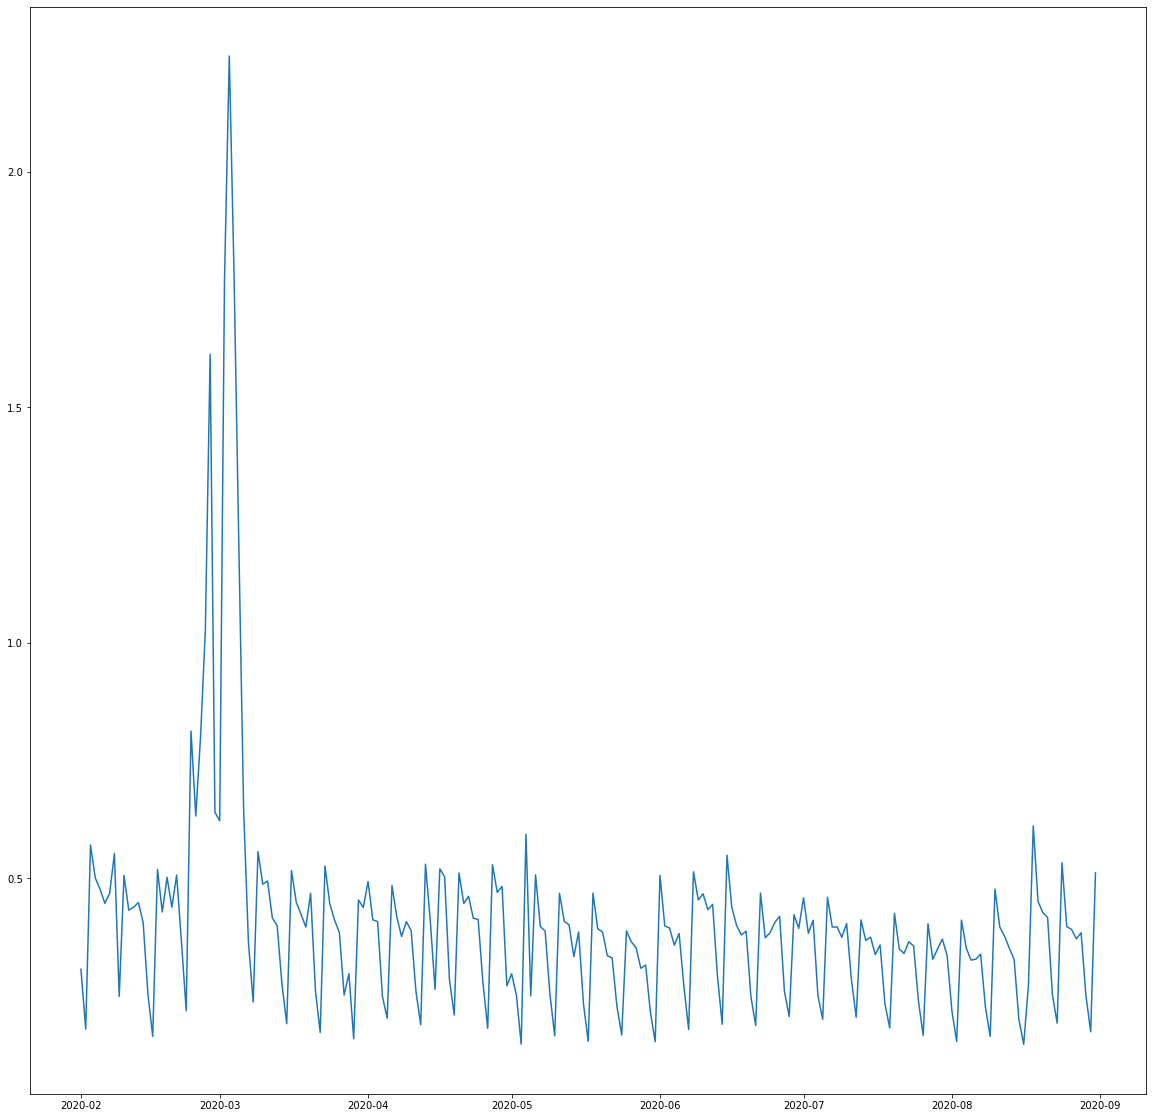

In [34]:
Call_shopping_grouped = Call_shopping.groupby(Call_shopping['일자(YYYYMMDD)'])
#Call_shopping_grouped.sum()
plt.plot(pd.to_datetime(Call_shopping_grouped.sum().index),Call_shopping_grouped.sum()['통화비율(시군구내)'])

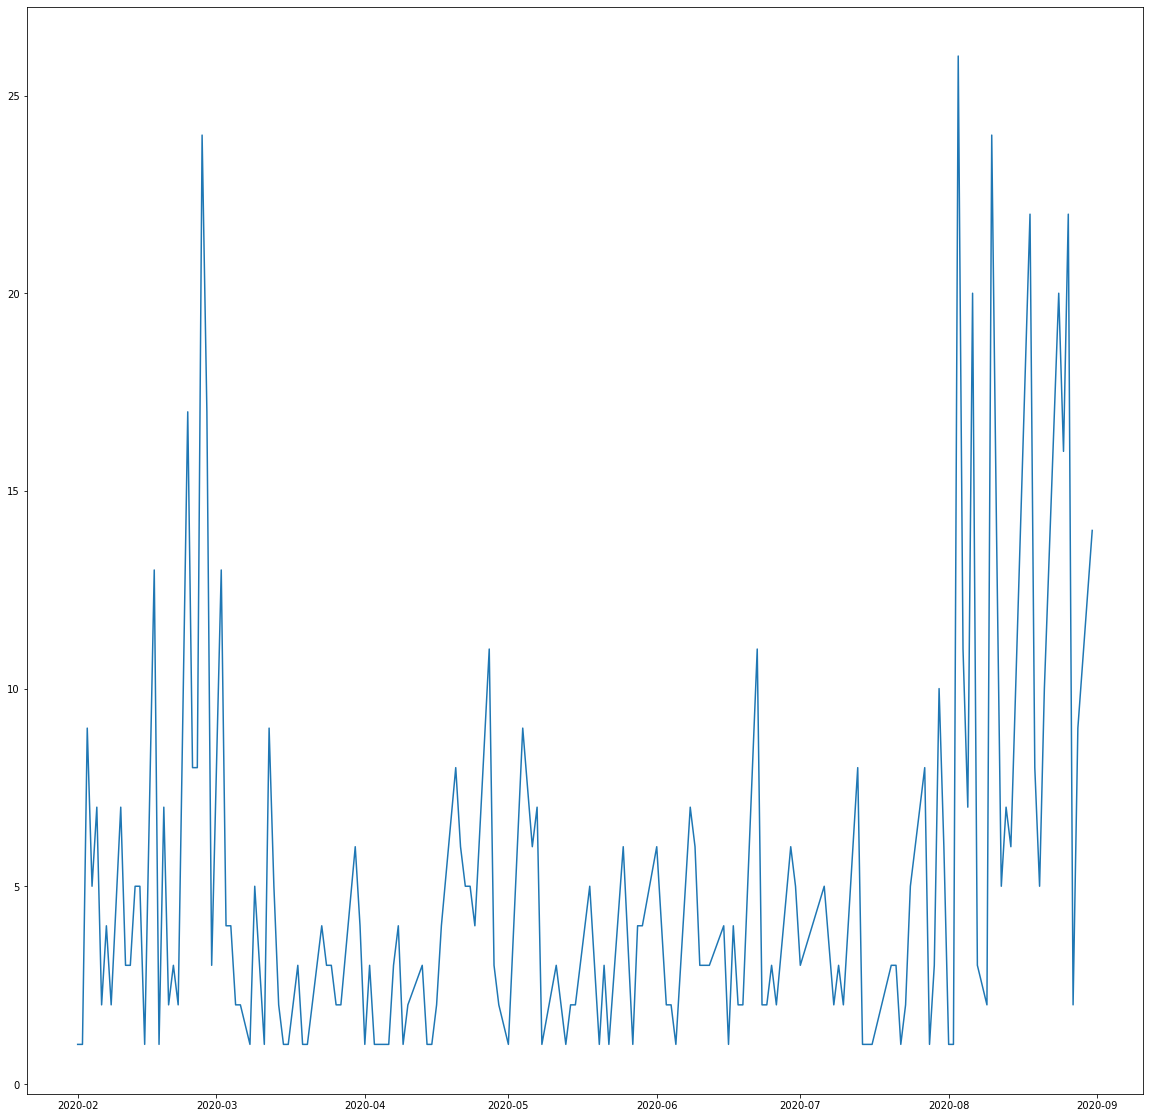

In [40]:
Call_building_grouped = Call_building.groupby(Call_building['일자(YYYYMMDD)'])
#Call_building_grouped.sum()
plt.plot(pd.to_datetime(Call_building_grouped.sum().index),Call_building_grouped.sum()['count'])

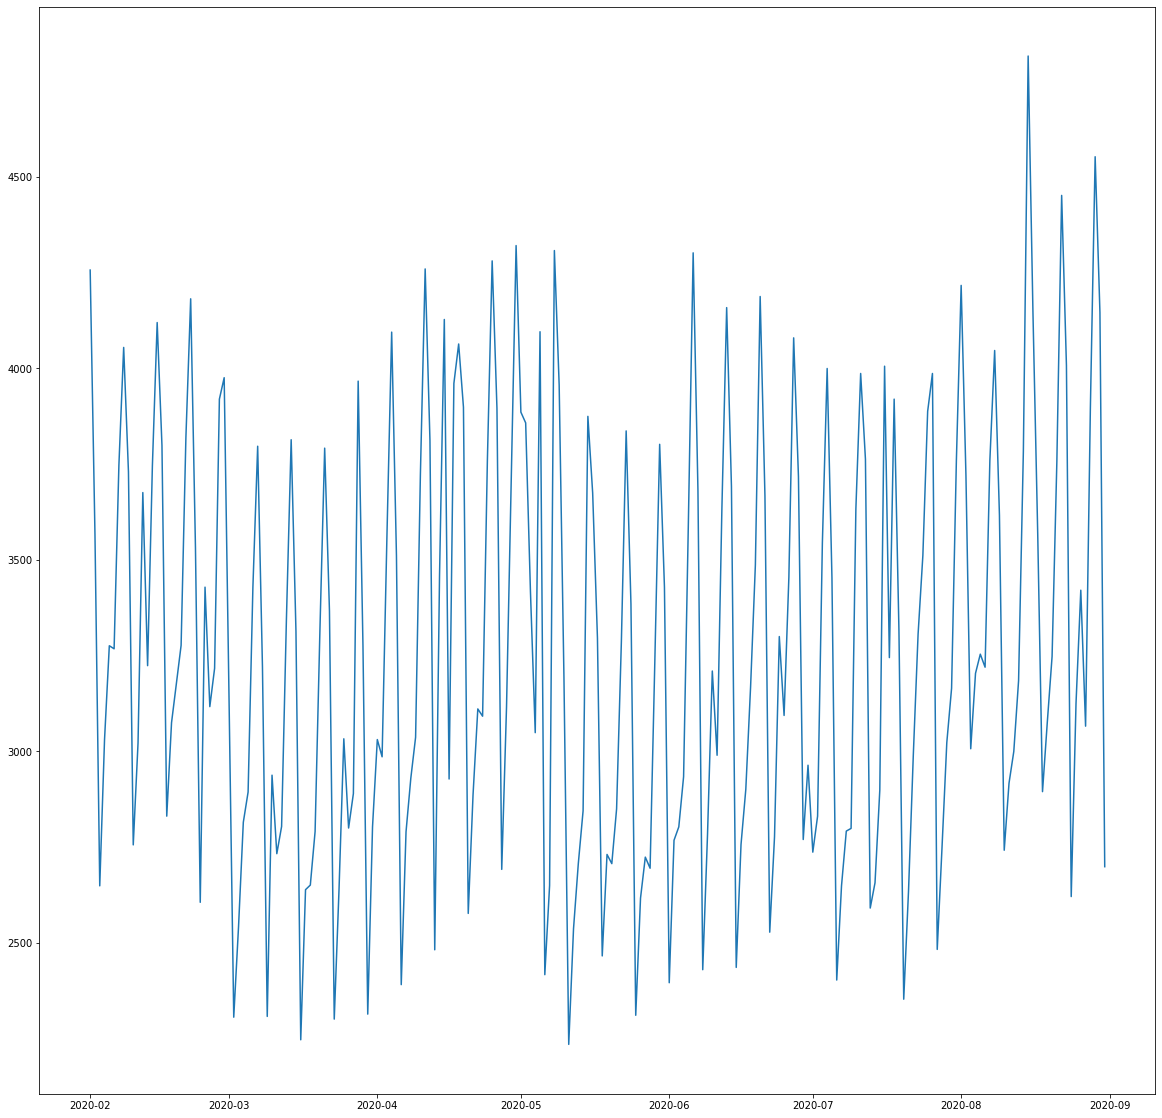

In [41]:
Call_restaurant_grouped = Call_restaurant.groupby(Call_restaurant['일자(YYYYMMDD)'])
#Call_restaurant_grouped.sum()
plt.plot(pd.to_datetime(Call_restaurant_grouped.sum().index),Call_restaurant_grouped.sum()['count'])

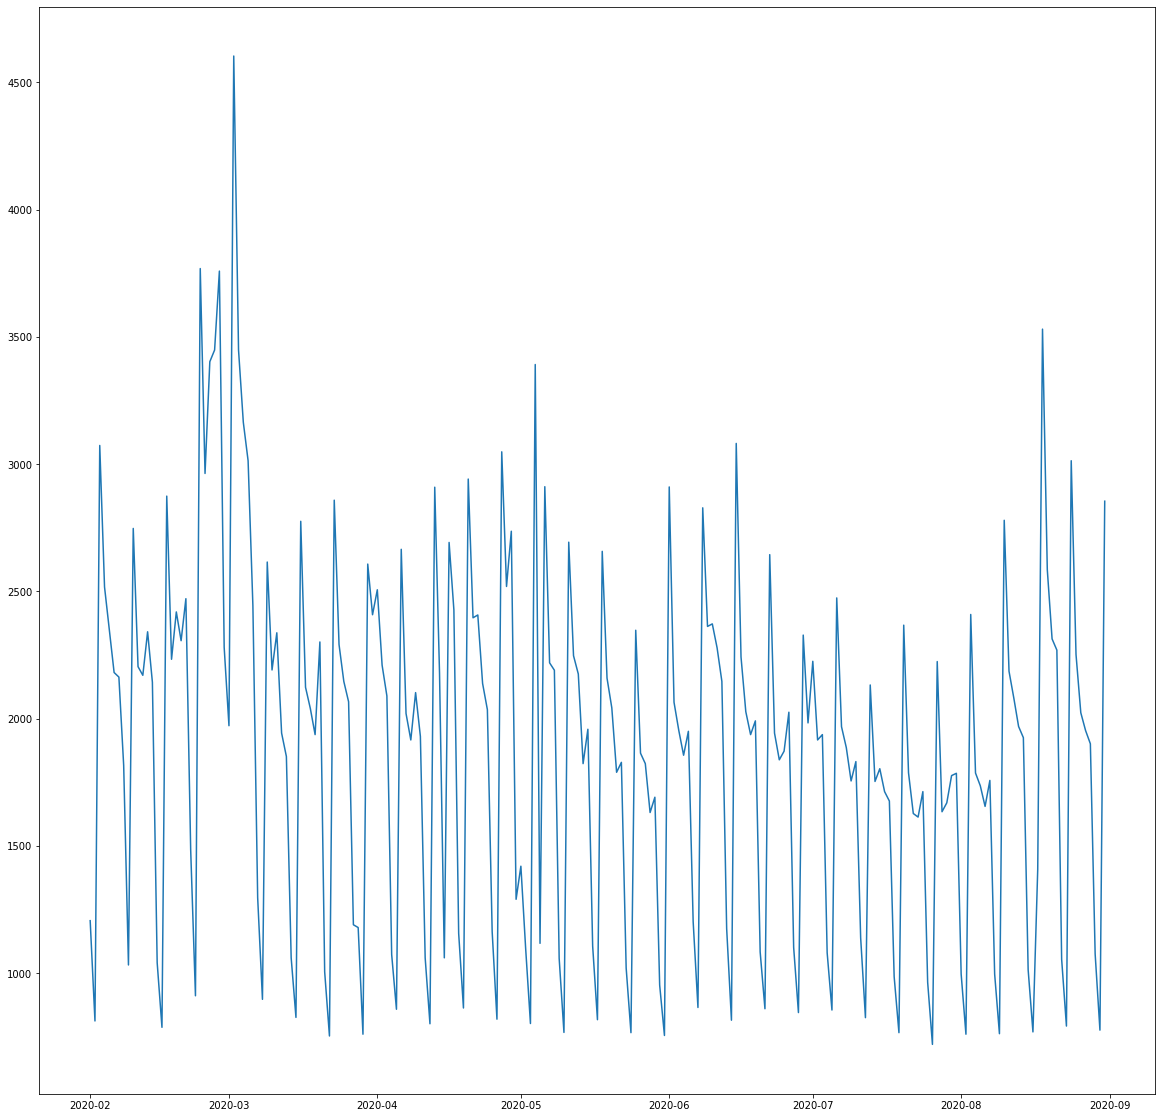

In [43]:
Call_shopping_grouped = Call_shopping.groupby(Call_shopping['일자(YYYYMMDD)'])
#Call_shopping_grouped.sum()
plt.plot(pd.to_datetime(Call_shopping_grouped.sum().index),Call_shopping_grouped.sum()['count'])

In [35]:
Roaming=pd.read_csv('Roaming.csv',encoding='euckr')

In [36]:
Roaming

,출국년월(YYYYMM),대륙,출국국가,성별,연령,출국비율
0,201902,기타,기타,남성,20,0.0526
1,201902,기타,기타,남성,30,0.0853
2,201902,기타,기타,남성,40,0.1222
3,201902,기타,기타,남성,50,0.1409
4,201902,기타,기타,남성,60,0.1041
...,...,...,...,...,...,...
17803,202008,중동,쿠웨이트,남성,40,0.3234
17804,202008,중동,쿠웨이트,남성,50,0.1893
17805,202008,중동,쿠웨이트,남성,60,0.0931
17806,202008,중동,쿠웨이트,여성,30,0.0521


In [44]:
Roaming['count']=1

In [45]:
Roaming['출국년월(YYYYMM)'] = pd.to_datetime(Roaming['출국년월(YYYYMM)'], format='%Y%m', errors='raise',yearfirst=True)

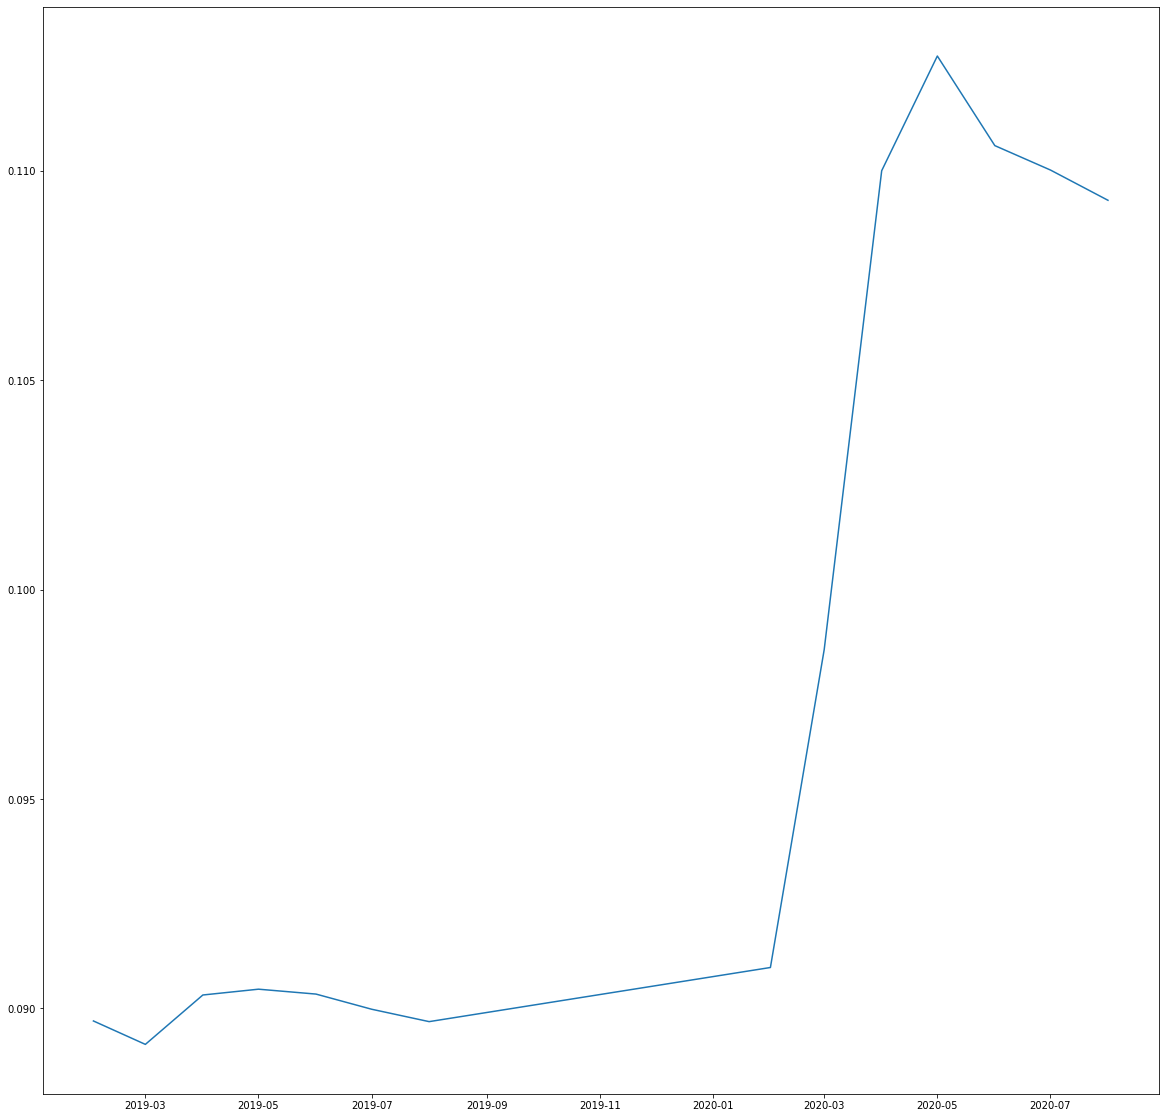

In [46]:
Roaming_grouped = Roaming.groupby(Roaming['출국년월(YYYYMM)'])
plt.plot(pd.to_datetime(Roaming_grouped.mean().index),Roaming_grouped.mean()['출국비율'])

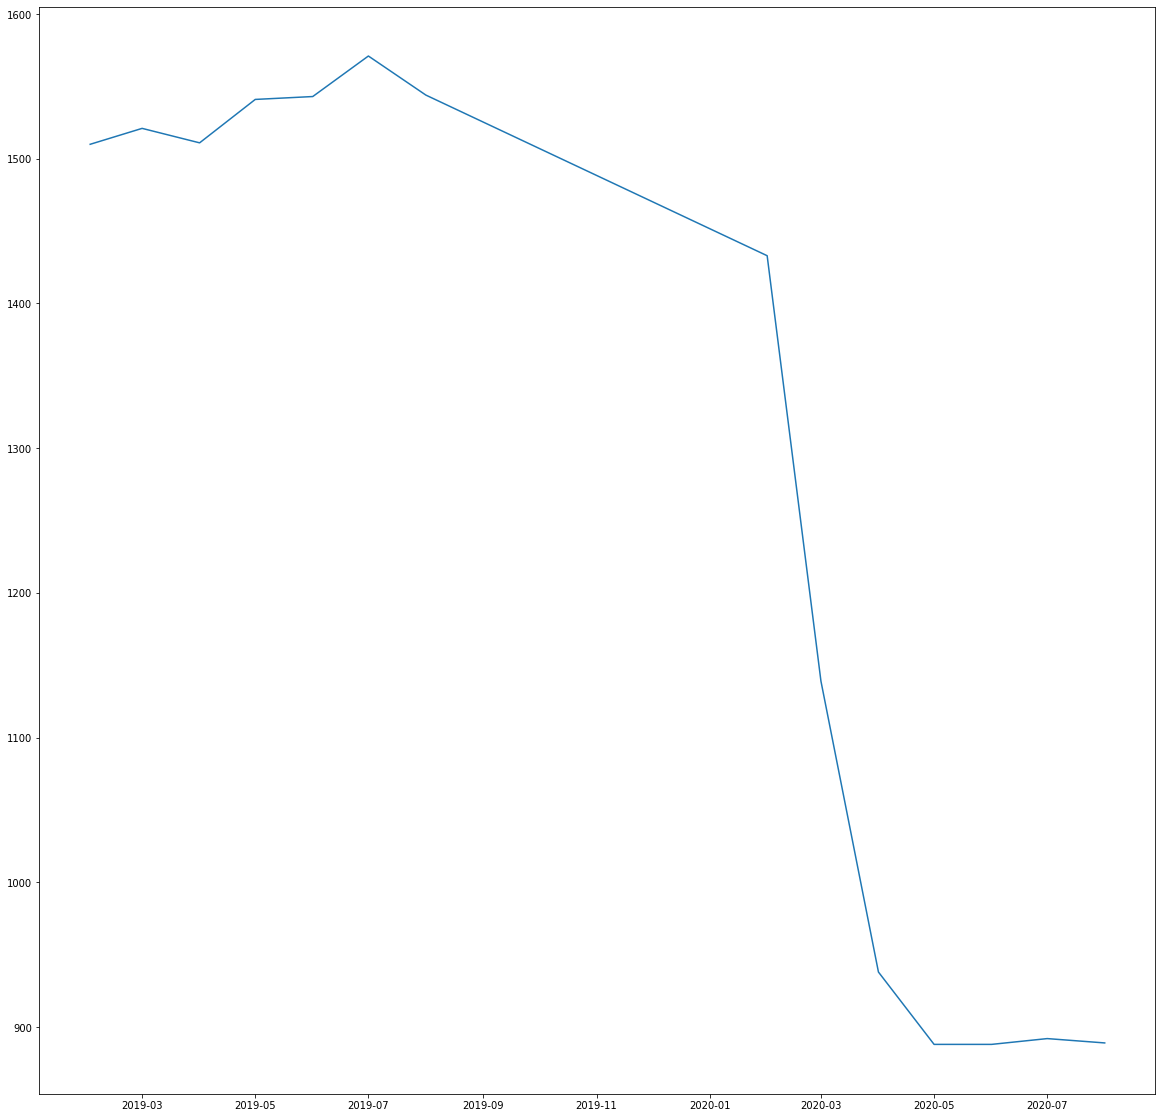

In [48]:
Roaming_grouped = Roaming.groupby(Roaming['출국년월(YYYYMM)'])
plt.plot(pd.to_datetime(Roaming_grouped.sum().index),Roaming_grouped.sum()['count'])

In [49]:
Roaming_grouped.sum()

,연령,출국비율,count
출국년월(YYYYMM),,,
2019-02-01,66450,135.4485,1510
2019-03-01,67790,135.5848,1521
2019-04-01,67840,136.4748,1511
2019-05-01,68680,139.3981,1541
2019-06-01,68080,139.3988,1543
2019-07-01,68590,141.3601,1571
2019-08-01,67370,138.4735,1544
2020-02-01,62780,130.3704,1433
2020-03-01,48890,112.2660,1139


In [22]:
import urllib.request as ul
import xmltodict
import json
import sys
import io
#http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson
url = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=ZMTAnFWekqdZuri7fhlNnqm6j6Sba2UlAhGZjOYldLfBG2%2BUQ90gLVMNoB6g13kIDxlkYK5ZsGmOi1cTEmKWkg%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200310&endCreateDt=20200315"
#데이터를 받을 url
 
request = ul.Request(url)
#url의 데이터를 요청함

response = ul.urlopen(request)
#요청받은 데이터를 열어줌

rescode = response.getcode()
#제대로 데이터가 수신됐는지 확인하는 코드 성공시 200


In [23]:
rescode

200

In [24]:
responseData = response.read()
responseData

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>99</resultCode><resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg></header></response>'

In [25]:
if(rescode == 200):
    
    #요청받은 데이터를 읽음
    rD = xmltodict.parse(responseData)
    #XML형식의 데이터를 dict형식으로 변환시켜줌

    rDJ = json.dumps(rD)
    #dict 형식의 데이터를 json형식으로 변환

    rDD = json.loads(rDJ)
    #json형식의 데이터를 dict 형식으로 변환
    
    print(rDD)
    #정상적으로 데이터가 출력되는지 확인

{'response': {'header': {'resultCode': '99', 'resultMsg': 'SERVICE KEY IS NOT REGISTERED ERROR.'}}}



if(rescode == 200):
    
    #요청받은 데이터를 읽음
    rD = xmltodict.parse(responseData)
    #XML형식의 데이터를 dict형식으로 변환시켜줌

    rDJ = json.dumps(rD)
    #dict 형식의 데이터를 json형식으로 변환

    rDD = json.loads(rDJ)
    #json형식의 데이터를 dict 형식으로 변환
    
    print(rDD)
    #정상적으로 데이터가 출력되는지 확인

    w_data = rDD["response"]["body"]["items"]["item"]
    #해당 dict형식의 파일의 item을 사용하기 편하도록 w_data에 저장

    print('관광지명 : '+w_data["spotName"])
    print('시간 : '+w_data["tm"])
    print('기온 : '+w_data["th3"])
    if (w_data["sky"] == '1'):
        print('하늘상태 : 맑음')
    elif(w_data["sky"] == '2'):
        print('하늘상태 : 구름조금')
    elif(w_data["sky"] == '3'):
        print('하늘상태 : 구름많음')
    elif(w_data["sky"] == '4'):
        print('하늘상태 : 흐림')
    elif(w_data["sky"] == '5'):
        print('하늘상태 : 비')
    elif(w_data["sky"] == '6' or w_data["sky"] == '7'):
        print('하늘상태 : 눈비')
    elif(w_data["sky"] == '8'):
        print('하늘상태 : 눈')
    else:
        print('하늘상태 : ???')

    print('강수확률 : '+w_data["pop"])

# 데이터출력하기

